In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('covid19-cdc-13432788.csv')

# (1) Prepare a data quality report for the CSV file.

### Check how many rows and columns the CSV has

In [3]:
# Check how many rows and columns this dataframe has
df.shape

(10000, 12)

### Print first and last 5 rows of CSV file

In [4]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/16,2020/11/16,NaN,2020/11/16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
1,2020/06/19,2021/01/24,2020/06/19,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Missing,Missing,No,Missing
2,2020/07/25,2020/09/30,NaN,2020/07/25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Missing,No,Missing
3,2020/06/13,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
4,2020/06/22,2020/08/15,2020/08/15,NaN,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Missing,Yes,Missing


In [5]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/07/06,2020/09/02,NaN,NaN,Laboratory-confirmed case,Unknown,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
9996,2020/12/17,NaN,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
9997,2020/10/23,2020/10/30,2020/10/27,2020/10/23,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,No,No,No,Yes
9998,2020/07/09,2020/07/09,NaN,2020/07/09,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Yes,Missing,No,Missing
9999,2021/01/04,2021/01/26,NaN,2021/01/26,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,Missing


### Converting features to appropriate datatypes

In [6]:
# Checking the current datatypes
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

Based on examining the data in a spreadsheet program, 4 of the features are datetime and the remaining 8 features are categorical.

- cdc_case_earliest_dt will be converted to datetime64 as it is a date type. We will delve deeper into this under the category of continuous. 
- cdc_report_dt will be converted to datetime64 as it is a date type. We will investigate deeper into this under the category of continuous.
- pos_spec_dt will be converted to datetime64 as it is a date type. We will look into this under the category of continuous.
- onset_dt will be converted to datetime64 as it is a date type. This will be closely looked at under the category of continuous.
- current_status will be converted to category as it contains only 2 possibile values. It will be investigated under the categorical features.
- sex will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.
- age_group will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.
- race_ethnicity_combined will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.
- hosp_yn will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.
- icu_yn will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.
- death_yn will be converted to category as it contains only 2 possibile values. It will be investigated under the categorical features.
- medcond_yn will be converted to category as it contains a finite number of possible values. It will be investigated under the categorical features.



In [7]:
# Convert data type to datetime for these columns
datetime_columns = df[['cdc_case_earliest_dt','cdc_report_dt','pos_spec_dt','onset_dt']].columns

for column in datetime_columns:
    df[column] = df[column].astype('datetime64')  
    
# Convert data type to category for these columns
categorey_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

for column in categorey_columns:
    df[column] = df[column].astype('category')  


df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

Converted the following columns to datetime64 type:
- cdc_case_earliest_dt
- cdc_report_dt
- pos_spec_dt
- onset_dt

Converted the following columns to categorical type:
- current_status
- sex
- age_group
- race_ethnicity_combined
- hosp_yn
- icu_yn
- death_yn
- medcond_yn

### Checking for duplicate row/columns

In [8]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Using "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  462
Number of duplicate rows (including first) in the table is: 821


In [9]:
# Check for duplicate columns
# Firstly transposing the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

Rows - It is impossible to tell in this dataset if they are legitimate duplicates as there is no primary key,for example id or patient name, to check if a patient is included twice. 
Therefore it is compared against all column attributes. This acts like a primary key. This initially returned 462 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. As there is no way of knowing, the safest way to proceed is to remove the duplicated items.

Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

#### Duplicate rows can be seen below

In [10]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
14,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing
34,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
42,2021-01-16,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
47,2020-12-07,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Missing,Missing,No,Missing
48,2021-01-11,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9967,2020-10-30,2020-10-30,NaT,2020-10-30,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
9970,2020-12-18,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9976,2020-12-16,NaT,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Missing,Missing,No,Missing
9982,2020-12-23,NaT,NaT,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Missing,No,Missing


In [11]:
# Check for duplicate rows and columns in this actual_duplicates df that atually has duplicated rows and columns, 
# to check the duplicate checks work correctly
actual_duplicates = df[df.duplicated(keep=False)].iloc[:,0:5].head()
actual_duplicates

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status
14,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case
34,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case
42,2021-01-16,NaT,NaT,NaT,Laboratory-confirmed case
47,2020-12-07,NaT,NaT,NaT,Laboratory-confirmed case
48,2021-01-11,NaT,NaT,NaT,Laboratory-confirmed case


In [12]:
print('Number of duplicate (excluding first) rows in the table is: ', actual_duplicates.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', actual_duplicates[actual_duplicates.duplicated(keep=False)].shape[0])

#transpose the actual_duplicates df
actual_duplicatesT = actual_duplicates.T
print("\nNumber of duplicate (excluding first) columns in the table is: ", actual_duplicatesT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  actual_duplicatesT[actual_duplicatesT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0

Number of duplicate (excluding first) columns in the table is:  2
Number of duplicate (including first) columns in the table is:  3


#### The duplicate checks seems to be working as expected.

Duplicate rows will now be dropped from the original data frame.

In [13]:
df = df.drop_duplicates(keep=False)
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


### Check for constant columns

In [14]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9179,2,Laboratory-confirmed case,8480
sex,9179,4,Female,4785
age_group,9179,10,20 - 29 Years,1641
race_ethnicity_combined,9179,9,"White, Non-Hispanic",3303
hosp_yn,9179,5,No,5098
icu_yn,9179,4,Missing,6850
death_yn,9179,2,No,8853
medcond_yn,9179,4,Missing,6681


**Categorical Data** - Reviewing the categorical data above we can see all unique values > 1
- *current_status* has 2 unique values
- *sex* has 4 unique values
- *age_group* has 10 unique values
- *race_ethnicity_combined* has 9 unique values
- *hosp_yn* has 5 unique values
- *icu_yn* has 4 unique values
- *death_yn* has 2 unique values
- *medcond_yn* has 4 unique values

In [15]:
# Print table with continuous statistics
df.select_dtypes(include=['datetime64']).describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9179,324,2021-01-05,92,2020-01-20,2021-01-16
cdc_report_dt,7581,325,2020-06-10,134,2020-01-20,2021-01-28
pos_spec_dt,2790,312,2020-11-23,37,2020-03-07,2021-01-24
onset_dt,5024,326,2020-11-30,47,2020-01-20,2021-01-26


**Continuous Data** - Reviewing the datetime data above we can see all unique values > 1.
- *cdc_case_earliest_dt* has 324 unique values
- *cdc_report_dt* has 325 unique values
- *pos_spec_dt* has 312 unique values
- *onset_dt* has 326 unique values


- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous datetime features are constant.
- Result - No constant columns

### Check for Null Values

In [16]:
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1598
pos_spec_dt                6389
onset_dt                   4155
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

Result - Null values exist in the spreadsheet for cdc_report_dt, pos_spec_dt and onset_dt. We will investigate further in order to determine the best possibile solution to dealing with these null values.


### Check for Irregular cardinalities & permitted values

In [17]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\n\nCurrent Status :", pd.unique(df["current_status"].ravel()))

print("\nSex :", pd.unique(df["sex"].ravel()))

print("\nAge Group :", pd.unique(df["age_group"].ravel()))

print("\nRace Ethniciity Combined :", pd.unique(df["race_ethnicity_combined"].ravel()))

print("\nHospital :", pd.unique(df["hosp_yn"].ravel()))

print("\nICU :", pd.unique(df["icu_yn"].ravel()))

print("\nDeath :", pd.unique(df["death_yn"].ravel()))

print("\nMedical Condition :", pd.unique(df["medcond_yn"].ravel()))


Unique values for:

Current Status : [Laboratory-confirmed case, Probable Case]
Categories (2, object): [Laboratory-confirmed case, Probable Case]

Sex : [Female, Male, Unknown, Missing]
Categories (4, object): [Female, Male, Unknown, Missing]

Age Group : [30 - 39 Years, 60 - 69 Years, 50 - 59 Years, 20 - 29 Years, 0 - 9 Years, 70 - 79 Years, 80+ Years, 40 - 49 Years, 10 - 19 Years, Missing]
Categories (10, object): [30 - 39 Years, 60 - 69 Years, 50 - 59 Years, 20 - 29 Years, ..., 80+ Years, 40 - 49 Years, 10 - 19 Years, Missing]

Race Ethniciity Combined : [White, Non-Hispanic, Unknown, Black, Non-Hispanic, Asian, Non-Hispanic, Native Hawaiian/Other Pacific Islander, Non-Hi..., Hispanic/Latino, Multiple/Other, Non-Hispanic, Missing, American Indian/Alaska Native, Non-Hispanic]
Categories (9, object): [White, Non-Hispanic, Unknown, Black, Non-Hispanic, Asian, Non-Hispanic, ..., Hispanic/Latino, Multiple/Other, Non-Hispanic, Missing, American Indian/Alaska Native, Non-Hispanic]

Hospit

There are no irregular cardinalities. The values that appear seem to be in the permitted range.

### Save updated/cleaned data frame to a new csv file.

In [18]:
# Write the dataframe to a csv file
df.to_csv('cleaned.csv', index=False)

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1 Check if there were icu admissions but not hospital admissions (not possible)

In [19]:
HospIcu = df[(df["hosp_yn"] == "No") & (df["icu_yn"] == 'Yes')]
print("Number of rows failing the test: ", HospIcu.shape[0])
HospIcu.head(1)

Number of rows failing the test:  1


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
8070,2020-10-17,2020-10-23,2020-10-21,2020-10-17,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",No,Yes,No,Yes


- Test 2 Check if date of first positive specimen collection is not blank then it should show a Laboratory-confirmed case in the current status. (Impossible)

In [20]:
# Where pos_spec_dt is not none and current_status is not Laboratory confirmed case.
# This will show an incorrect current_status
positivetest = df[df["pos_spec_dt"].notna() & (df['current_status'] != 'Laboratory-confirmed case')]
print("Number of rows failing the test: ", positivetest.shape[0])
positivetest.head(5)

Number of rows failing the test:  220


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
35,2020-09-04,2020-09-15,2020-09-04,NaT,Probable Case,Male,20 - 29 Years,"White, Non-Hispanic",No,No,No,No
228,2020-12-02,2020-12-02,2020-12-02,NaT,Probable Case,Female,50 - 59 Years,"Black, Non-Hispanic",No,Unknown,No,No
252,2020-06-29,2021-01-24,2020-06-29,NaT,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
494,2020-11-19,2020-12-14,2020-11-19,2020-11-19,Probable Case,Male,80+ Years,"White, Non-Hispanic",No,No,No,Yes
499,2020-05-04,2021-01-21,2020-05-04,NaT,Probable Case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing


- Test 3 Check if current status is Laboratory-confirmed case but first positive specimen collection is blank (impossible)

In [21]:
# Where current_status is Laboratory-confirmed case and pos_spec_dt is blank
# This will show an incorrect pos_spec_dt as this should be populated provided there is a laboratory confirmed case
blanktest = df[df["pos_spec_dt"].isnull() & (df['current_status'] == 'Laboratory-confirmed case')]
print("Number of rows failing the test: ", blanktest.shape[0])
blanktest.head(5)

Number of rows failing the test:  5910


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-11-16,2020-11-16,NaT,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
2,2020-07-25,2020-09-30,NaT,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Missing,No,Missing
3,2020-06-13,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
6,2020-11-14,2020-11-14,NaT,2020-11-14,Laboratory-confirmed case,Male,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,Missing,No,Missing
8,2020-12-28,2020-12-28,NaT,2020-12-28,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Unknown,Missing,No,Missing


- Test 4 Check if date of positive specimen collection is not before the earliest available date for the record (Impossible)

In [22]:
# Checking if person received a positive result before earliest available record date

testdate = df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']]
print("Number of rows failing the test: ", testdate.shape[0])
testdate.head(5)           

Number of rows failing the test:  76


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
699,2020-04-02,2020-04-05,2020-03-31,2020-04-02,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,No,No,Yes
889,2020-05-16,2020-05-16,2020-05-11,2020-05-21,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,No,Yes
923,2020-09-21,2020-09-19,2020-09-19,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Hispanic/Latino,No,Unknown,No,Unknown
1029,2020-10-14,2020-10-13,2020-10-13,2020-10-14,Laboratory-confirmed case,Female,80+ Years,Unknown,Yes,Unknown,Yes,Unknown
1301,2020-12-25,2020-12-24,2020-12-24,2020-12-25,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown


- Test 5 Check if date of positive specimen collection is prior to symptom onset date. (Impossible)

In [23]:
sympomatictest = df[df['pos_spec_dt'] < df['onset_dt']]
print("Number of rows failing the test: ", sympomatictest.shape[0])
sympomatictest.head(5)    

Number of rows failing the test:  77


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
699,2020-04-02,2020-04-05,2020-03-31,2020-04-02,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,No,No,Yes
889,2020-05-16,2020-05-16,2020-05-11,2020-05-21,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Missing,Missing,No,Yes
923,2020-09-21,2020-09-19,2020-09-19,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Hispanic/Latino,No,Unknown,No,Unknown
1029,2020-10-14,2020-10-13,2020-10-13,2020-10-14,Laboratory-confirmed case,Female,80+ Years,Unknown,Yes,Unknown,Yes,Unknown
1301,2020-12-25,2020-12-24,2020-12-24,2020-12-25,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown


- Test 6 Check if earliest date is populated but initial date is blank.

- Based on the CDC report the "CDC recommends researchers use cdc_case_earliest_dt in time series". The cdc_report_dt should not be blank provided cdc_case_earliest_dt is populated 

In [24]:
earlytest = df[df["cdc_case_earliest_dt"].notna() & df["cdc_report_dt"].isnull()]
print("Number of rows failing the test: ", earlytest.shape[0])
earlytest.head(5)   

Number of rows failing the test:  1598


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
3,2020-06-13,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
11,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,No,Missing
17,2020-12-26,NaT,NaT,NaT,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,Missing,No,Missing
19,2020-09-19,NaT,NaT,NaT,Laboratory-confirmed case,Male,60 - 69 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
20,2020-12-09,NaT,NaT,NaT,Laboratory-confirmed case,Male,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing


- Test 7 Check if earliest date is actually the earliest available date

In [25]:
earlytest2 = df[df['cdc_case_earliest_dt'] > df['cdc_report_dt']]
print("Number of rows failing the test: ", earlytest2.shape[0])
earlytest2.head(5)   

Number of rows failing the test:  32


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
923,2020-09-21,2020-09-19,2020-09-19,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Hispanic/Latino,No,Unknown,No,Unknown
1029,2020-10-14,2020-10-13,2020-10-13,2020-10-14,Laboratory-confirmed case,Female,80+ Years,Unknown,Yes,Unknown,Yes,Unknown
1301,2020-12-25,2020-12-24,2020-12-24,2020-12-25,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown
2215,2020-09-27,2020-09-25,2020-09-25,2020-09-27,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,No
2547,2020-09-04,2020-08-26,2020-09-07,2020-09-04,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Yes,No,Yes


## Descriptive Statistics: Continuous Features

In [26]:
for feature in datetime_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

cdc_case_earliest_dt
----------

Range cdc_case_earliest_dt is:  362 days 00:00:00
----------
Value  Number of Instances
2021-01-05    92
2020-12-29    82
2021-01-04    82
2020-11-30    81
2021-01-06    80
2020-12-07    80
2020-12-18    79
2020-12-28    78
2020-12-08    78
2020-12-09    77
2020-11-20    76
2020-12-14    73
2021-01-08    73
2020-12-03    73
2020-12-21    72
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
----------

Range cdc_report_dt is:  374 days 00:00:00
----------
Value  Number of Instances
2020-06-10    134
2020-12-29     88
2020-11-25     79
2020-12-14     76
2021-01-21     72
2021-01-27     68
2021-01-07     65
2020-12-07     65
2021-01-16     64
2020-12-03     63
2021-01-12     62
2021-01-06     61
2020-12-04     60
2020-11-16     59
2020-12-31     59
Name: cdc_report_dt, dtype: int64 



pos_spec_dt
----------

Range pos_spec_dt is:  323 days 00:00:00
----------
Value  Number of Instances
2020-11-23    37
2020-12-02    32
2020-11-20    32
2020-11-09

In [27]:
# Display the cardinality of each continuous feature

datetime_cardinality = list(df[datetime_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in datetime_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

cdc_case_earliest_dt                 324
cdc_report_dt                        326
pos_spec_dt                          313
onset_dt                             327


**Running Assessment:**
<br><br>

- Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed do not appear to have any significant outliers. A greater understanding of the continuous features will be obtained from data presented on histograms and boxplots.

In [28]:
# For each continuous feature, checking the occurances of the max & min number of instances of cdc_report_dt

print("Instance Count of Date\n---------------")

for col in datetime_columns:
    print("Feature:", col, "\t")
    print(len(df[df[col] == "2020-06-10"]), "occurrences on 10th June 2020")
    print(len(df[df[col] == "2020-12-31"]), "occurrences on 31st December 2020")
    print("\n\n")

Instance Count of Date
---------------
Feature: cdc_case_earliest_dt 	
19 occurrences on 10th June 2020
61 occurrences on 31st December 2020



Feature: cdc_report_dt 	
134 occurrences on 10th June 2020
59 occurrences on 31st December 2020



Feature: pos_spec_dt 	
3 occurrences on 10th June 2020
12 occurrences on 31st December 2020



Feature: onset_dt 	
10 occurrences on 10th June 2020
28 occurrences on 31st December 2020





### - Prepare a table with descriptive statistics for all the continuous features.

In [29]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['datetime64']).columns
df[continuous_columns].describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9179,324,2021-01-05,92,2020-01-20,2021-01-16
cdc_report_dt,7581,325,2020-06-10,134,2020-01-20,2021-01-28
pos_spec_dt,2790,312,2020-11-23,37,2020-03-07,2021-01-24
onset_dt,5024,326,2020-11-30,47,2020-01-20,2021-01-26


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [30]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [31]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
current_status,9179,2,Laboratory-confirmed case,8480
sex,9179,4,Female,4785
age_group,9179,10,20 - 29 Years,1641
race_ethnicity_combined,9179,9,"White, Non-Hispanic",3303
hosp_yn,9179,5,No,5098
icu_yn,9179,4,Missing,6850
death_yn,9179,2,No,8853
medcond_yn,9179,4,Missing,6681


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [32]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms summary sheet for all the continuous features.

### - Plot histograms individual sheet for all the continuous features.

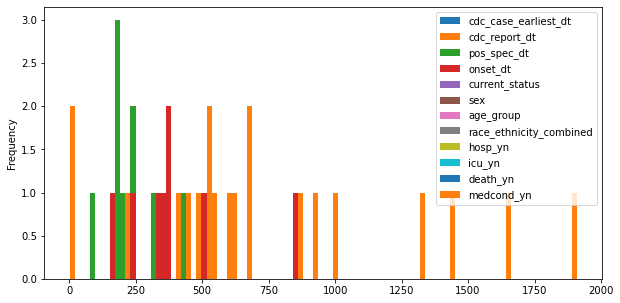

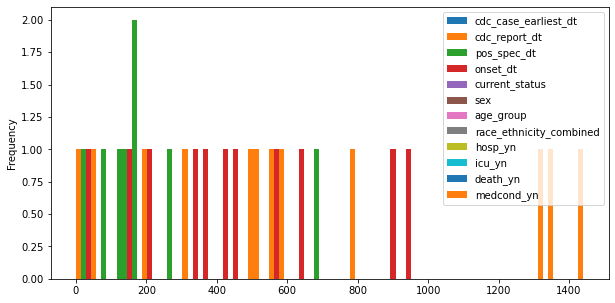

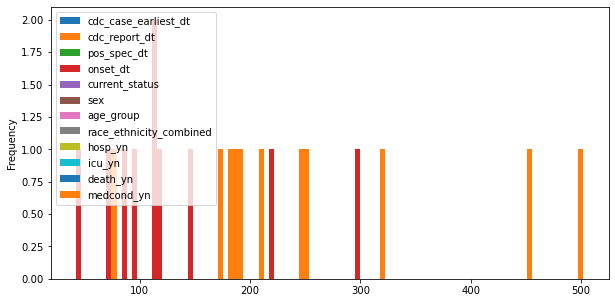

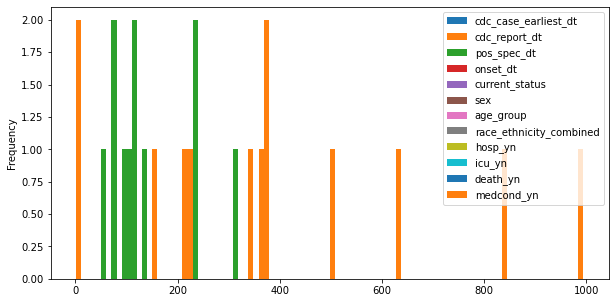

In [33]:
with PdfPages('continuous_histograms.pdf') as pp:
    for col in continuous_columns:
        f = df.groupby([df[col].dt.year, df[col].dt.month]).count().plot(kind="hist", figsize=(10,5), bins=100)
        pp.savefig(f.get_figure())
        plt.show() 

### - Plot box plots summary sheet for all the continuous features.

### - Plot box plots individual sheet for all the continuous features.

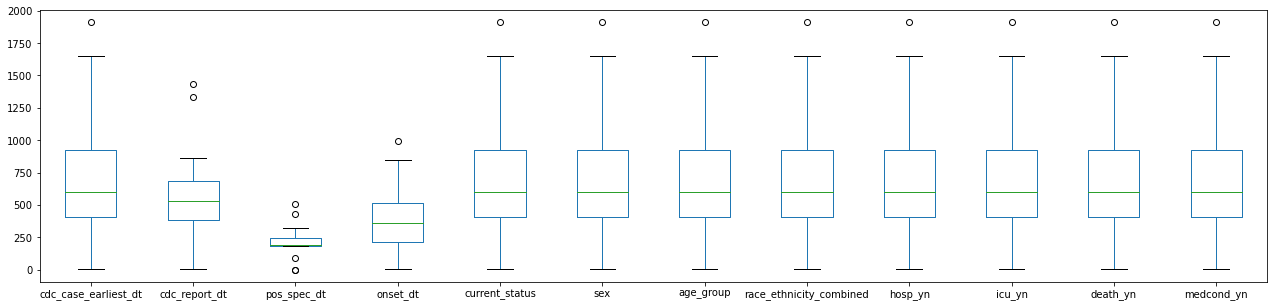

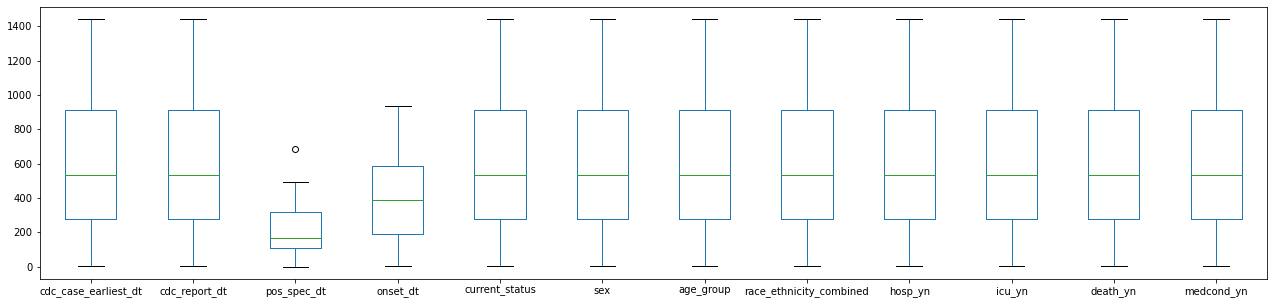

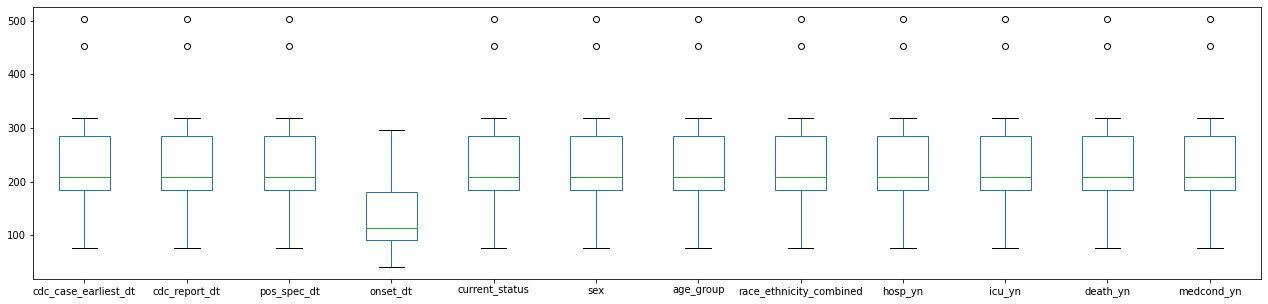

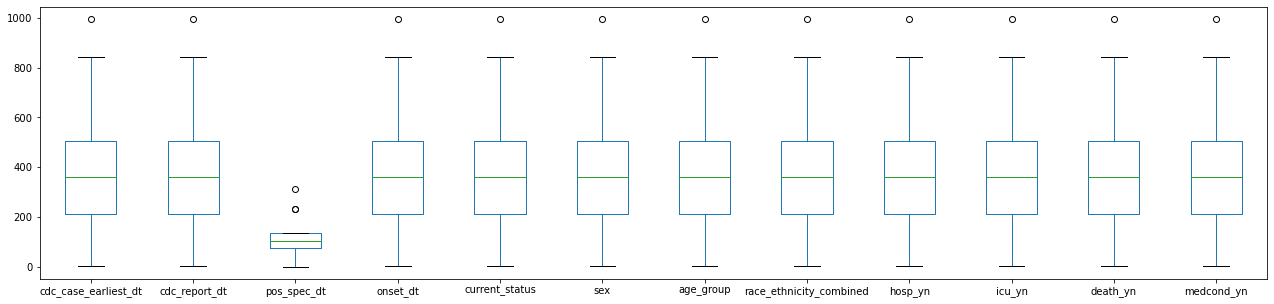

In [34]:
with PdfPages('continuous_boxplots.pdf') as pp:
    for col in continuous_columns:
        f = df.groupby([df[col].dt.year, df[col].dt.month]).count().plot(kind="box", figsize=(22,5))
        pp.savefig(f.get_figure())
        plt.show() 

### - Plot bar plots summary sheet for all the categorical features.

### - Plot bar plots individual sheet for all the categorical features.

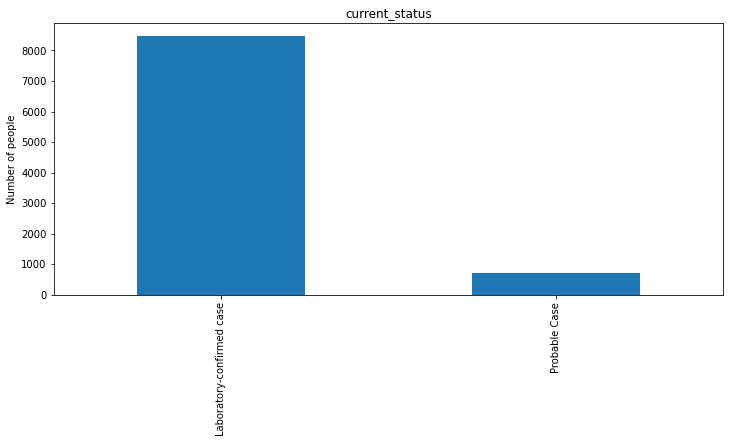

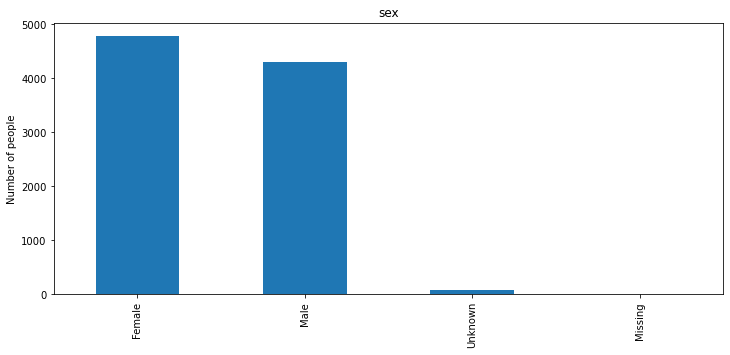

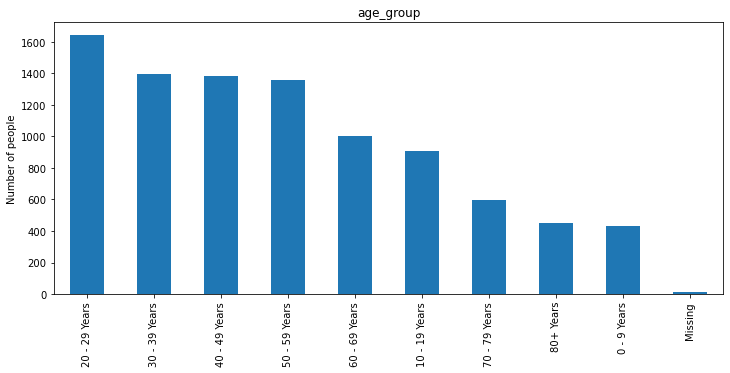

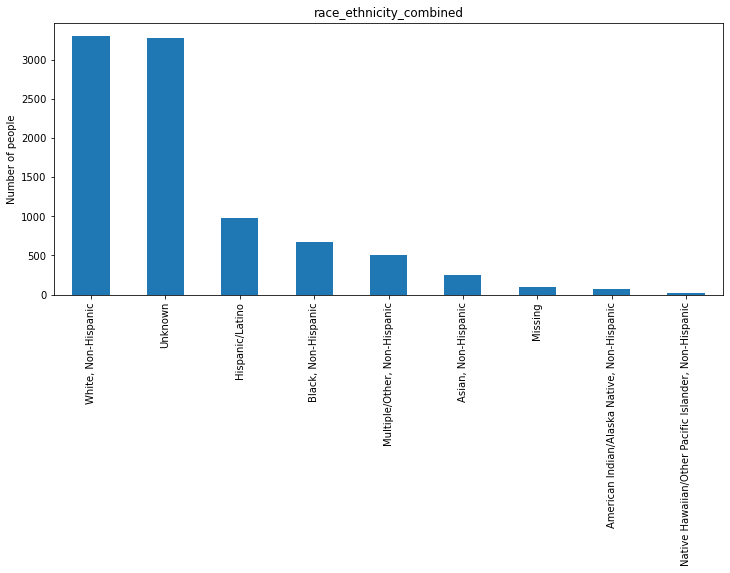

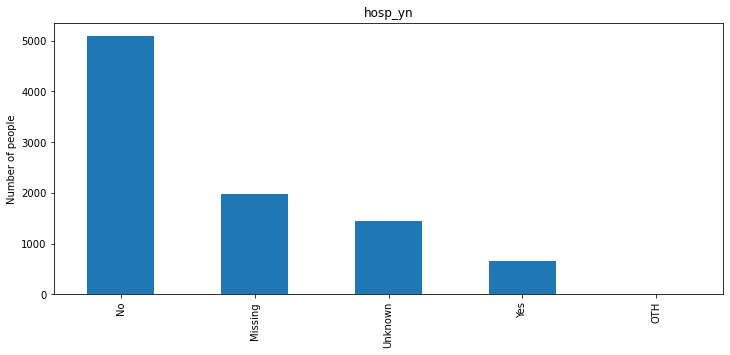

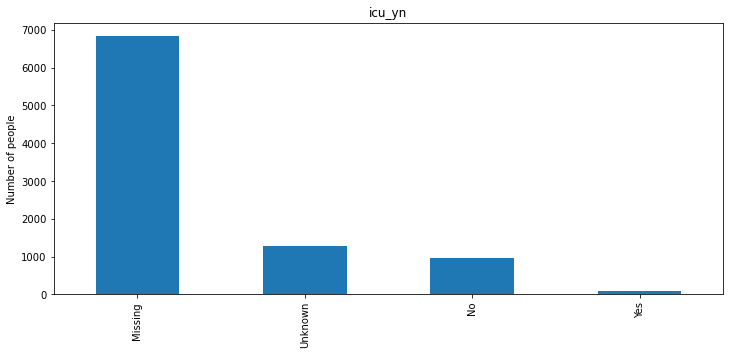

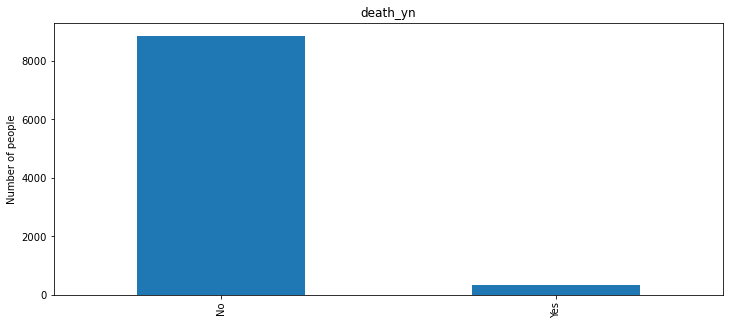

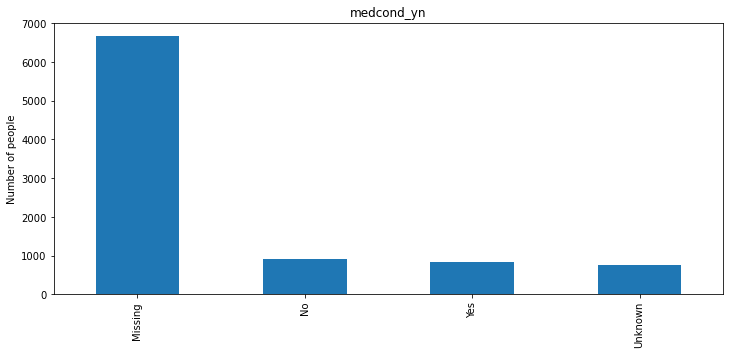

In [35]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,5))
        plt.title(col)
        plt.ylabel('Number of people')
        pp.savefig(f.get_figure())
        plt.show()

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying DataQualityReportInitialFindings.pdf file

# (2) Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **DataQualityReportInitialFindings.pdf**:

1. A large number of duplicate data that was removed from the dataset. 821 duplicates were found and dropped as part of the initial cleaning.
2. There was a large number of null values, 12,142 in total.
3. Impossible to have hosp_yn as "no" and icu_yn as "yes". Inaccurate hosp_yn column. (Logical integrity test 1)
4. The current_status cannot be "Probable Case" if it has a "pos_spec_dt" (Logical integrity test 2)
5. The column pos_spec_dt should not be blank provided it is a laboratory confirmed case. (Logical integrity test 3)
6. The pos_spec_dt should not be before the earliest available date (cdc_case_earliest_dt)  (Logical integrity test 4)
7. The date of pos_spec_dt should not be before the onset_dt (Logical integrity test 5)
8. If the cdc_case_earliest_dt is populated, the cdc_report_dt should not be blank. As per the CDC report; "CDC recommends researchers use cdc_case_earliest_dt in time series". The cdc_report_dt should not be blank provided cdc_case_earliest_dt is populated (Logical integrity test 6)
9. The earliest available date should be the cdc_case_earliest_dt column (Logical integrity test 7)
10. cdc_report_dt is a depreciated column as per the CDC report.
11. "Unknown" and "missing" essentially have the same meaning.
12. Occurances of "Unknown" occur in multiple categorical features.

### Propose solutions to deal with the problems identified. 

1. **Large Number of Duplicate Data**
    -  821 duplicates were found in this data. It is impossible to tell if these are legitmate duplicates from this dataset as there is no primary key. Neither an id or a patient name to distinguish these pieces of data. It was decided that the safest way to go about this from a machine learning perspective was to remove these duplicates.
    
    
2. **Large Number of Null values**
    -  12,142 total null values were found in this dataset. We will be examining each column in a case by case basis to decide how to approach these null values. 
    - As a general rule of thumb, if the null values account for over 60% of the values in the feature, we will drop the feature altogether.
    - We may also consider imputation, however we may be reluctant to use imputation on features in excess of 30%.
    
3. **hosp_yn as "no" and icu_yn as "yes"**
    -  It is impossible to tell if the error occured as a result of an incorrect hosp_yn field or an incorrect icu_yn, so we cannot use imputation for this case.
    - We will drop the row as it only accounts for 1 row (as per logical integrity test 1) and displays little information.
    
4. **current_status cannot be "Probable Case" if it has a pos_spec_dt**
    -  If there is a populated pos_spec_dt and the current_status reads as "Probable Case", this is impossible and should be "Laboratory-confirmed case".
    - This accounts for 220 results as per the logical integrity test 2, we will impute these results.
    
5. **pos_spec_dt should not be blank provided it is a laboratory confirmed case**
    -  If the current_status reads as "Laboratory confirmed case", the pos_spec_dt should not be blank.
    - It looks as though this column will need to be dropped as these null values account for 5,910 as per logical integrity test 3. 
    - This accounts for over 59% of the dataset which is too much to impute, we will be investigating this further. 
    
6. **pos_spec_dt before the earliest available date**
    -  If there is a populated pos_spec_dt that is prior to the earliest available date (cdc_case_earliest_dt), impute this information with the date of the pos_spec_dt.
    - There are 76 results failing this test as per logical integrity test 4. We will impute these results.
    
7. **pos_spec_dt should not be before the onset_dt**
    -  The pos_spec_dt should not be prior to the symptom onset date (onset_dt).
    - We will impute this onset_dt with the pos_spec_dt as there is only 77 (as per logical integrity test 5) results failing ths test as per logical integrity test 5.
    
8. **If cdc_case_earliest_dt is populated, the cdc_report_dt should not be blank**
    -  As per the CDC report, "CDC recommends researchers use cdc_case_earliest_dt in time series".
    - This accounts for 1598 (as per logical integrity test 6), which is roughly 16% of the dataset. We will need to investigate this further to see if it is possible to impute this field.
    
9. **Earliest available date should be the cdc_case_earliest_dt column**
    -  The earliest available date (cdc_case_earliest_dt) should be the earliest date in the dataset.
    - There are 32 results that are failing this as per logical integrity test 7. We will impute these results.

10. **cdc_report_dt is a depreciated column as per the CDC report**
    -  As this is a depreciated column, we will need to drop this column.
    
11. **"Unknown" and "missing" essentially have the same meaning**
    -  These will be imputed under the same name category; "Unknown"
    
12. **Occurances of "Unknown" occur in multiple categorical features**
    - Check the occurances of "Unknown" in each of the categorical features to decide what to do with them.


### Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **Large Number of Duplicate Data**
    - Already removed these duplicates. It was decided that the safest way to go about this from a machine learning perspective was to remove these duplicates.

2. **Large Number of Null values**
    -  12,142 total null values were found in this dataset. We will be examining each column in a case by case basis to decide how to approach these null values. 

In [36]:
# Null values for each of the columns
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1598
pos_spec_dt                6389
onset_dt                   4155
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

In [37]:
datetime_columns = df.select_dtypes(['datetime64']).columns

In [38]:
# Prepare %missing column
datetime_columns_missing  = 100 * (df[datetime_columns].isnull().sum()/df.shape[0])
# store the datetime values in a dataframe
df_datetime_missing = pd.DataFrame(datetime_columns_missing, columns=['%Null'])
df_datetime_missing

,%Null
cdc_case_earliest_dt,0.000000
cdc_report_dt,17.409304
pos_spec_dt,69.604532
onset_dt,45.266369


**How will we approach these null values?**
- As a general rule of thumb, if the null values account for over 60% of the values in the feature, we will drop the feature altogether.
- We may also consider imputation, however we may be reluctant to use imputation on features in excess of 30%.

**In this case:**
    - cdc_case_earliest_dt has no null values and we will not touch it.
    
    - cdc_report_dt has 17.4% null values. This fits the range to use imputation. However, the CDC report labelled this feature as "depreciated". As a result, we will drop this column.
    
    - pos_spec_dt has 69.6% null values. This column is beyond salvageable from imputation. We have no choice but to drop this column.
    
    - onset_dt has 45.3% null values. This column has too many null values to use imputation and as a result, we will drop this column.

In [39]:
# Dropping cdc_report_dt, pos_spec_dt, onset_dt
df = df.drop(['cdc_report_dt', 'pos_spec_dt', 'onset_dt'], axis = 1)

3. **hosp_yn as "no" and icu_yn as "yes"**
    - We will drop the row as it only accounts for 1 row (as per logical integrity test 1) and it is impossible to tell where the error is from.

In [40]:
# Running the test to show the failing result
HospIcu = df[(df["hosp_yn"] == "No") & (df["icu_yn"] == 'Yes')]
print("Number of rows failing the test: ", HospIcu.shape[0])
HospIcu.head(5)

Number of rows failing the test:  1


,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
8070,2020-10-17,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",No,Yes,No,Yes


In [41]:
print("Total number of rows dropped: ", HospIcu.shape[0])
df = df.drop(HospIcu.index)

Total number of rows dropped:  1


Rerunning the test to show the failure has been taken care of

In [42]:
HospIcu = df[(df["hosp_yn"] == "No") & (df["icu_yn"] == 'Yes')]
print("Number of rows failing the test: ", HospIcu.shape[0])
HospIcu.head(5)

Number of rows failing the test:  0


,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


4. **Current_status cannot be "Probable Case" if it has a pos_spec_dt**
    - pos_spec_dt has been dropped as a column in solution 2. Solution already applied.

5. **pos_spec_dt should not be blank provided it is a laboratory confirmed case**
    - pos_spec_dt has been dropped as a column in solution 2. Solution already applied.

6. **pos_spec_dt before the earliest available date**
    - pos_spec_dt has been dropped as a column in solution 2. Solution already applied.

7. **pos_spec_dt should not be before the onset_dt**
    - pos_spec_dt has been dropped as a column in solution 2. Solution already applied.

8. **If cdc_case_earliest_dt is populated, the cdc_report_dt should not be blank**
    - cdc_report_dt has been dropped as a column in solution 2. Solution already applied.

9. **Earliest available date should be the cdc_case_earliest_dt column**
    - cdc_report_dt has been dropped as a column in solution 2. Solution already applied.

10. **cdc_report_dt is a depreciated column as per the CDC report**
    - cdc_report_dt has been dropped as a column in solution 2. Solution already applied.

11. **"Unknown" and "missing" essentially have the same meaning**
    -  These will be imputed under the same category; "Unknown"

In [43]:
# Replacing "Missing" with "Unknown" for consistancy.
df = df.replace(to_replace =["Missing"],  
                            value ="Unknown")
# Showing there are no more "Missing" results
df.head(5)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Unknown,No,Unknown
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Unknown,No,Unknown
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Unknown,No,Unknown
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Unknown


12. **Check the occurances of "Unknown" in each of the categorical features**

In [44]:
df.current_status.value_counts()

Laboratory-confirmed case    8479
Probable Case                 699
Name: current_status, dtype: int64

- There are no Unknowns, we will leave this column alone

In [45]:
df.sex.value_counts()

Female     4785
Male       4299
Unknown      94
Name: sex, dtype: int64

- There are little Unknowns, we will leave this column alone

In [46]:
df.age_group.value_counts()

20 - 29 Years    1641
30 - 39 Years    1393
40 - 49 Years    1385
50 - 59 Years    1355
60 - 69 Years    1004
10 - 19 Years     909
70 - 79 Years     593
80+ Years         453
0 - 9 Years       431
Unknown            14
Name: age_group, dtype: int64

- There are little Unknowns, we will leave this column alone

In [47]:
df.race_ethnicity_combined.value_counts()

Unknown                                                 3364
White, Non-Hispanic                                     3302
Hispanic/Latino                                          981
Black, Non-Hispanic                                      676
Multiple/Other, Non-Hispanic                             508
Asian, Non-Hispanic                                      256
American Indian/Alaska Native, Non-Hispanic               67
Native Hawaiian/Other Pacific Islander, Non-Hispanic      24
Name: race_ethnicity_combined, dtype: int64

- Although there are large amounts of Unknowns. These could be due to legitmate Unknowns. For example, a patient does not fit into one of these predefined categories, so instead decides to put themself in the category of Unknown. 

- As a result, we will leave this column alone.

In [48]:
df.hosp_yn.value_counts()

No         5097
Unknown    3418
Yes         661
OTH           2
Name: hosp_yn, dtype: int64

- There is quite a number of "Unknowns" in this category. But not enough to drop this feature completely. 

- We will leave this column alone

In [49]:
df.icu_yn.value_counts()

Unknown    8136
No          965
Yes          77
Name: icu_yn, dtype: int64

- There are too many "Unknowns" in this feature.
- We are forced to drop the icu_yn column

In [50]:
# Dropping the icu column
df = df.drop(['icu_yn'], axis = 1)

In [51]:
df.death_yn.value_counts()

No     8852
Yes     326
Name: death_yn, dtype: int64

- There are no Unknowns, we will leave this column alone

In [52]:
df.medcond_yn.value_counts()

Unknown    7438
No          917
Yes         823
Name: medcond_yn, dtype: int64

- There are too many "Unknowns" in this feature.
- We are forced to drop the medcond_yn column

In [53]:
# Dropping the medcond_yn column
df = df.drop(['medcond_yn'], axis = 1)

In [54]:
df

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes
...,...,...,...,...,...,...,...
9995,2020-07-06,Laboratory-confirmed case,Unknown,40 - 49 Years,Unknown,Unknown,No
9996,2020-12-17,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,No
9997,2020-10-23,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,No,No
9998,2020-07-09,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Yes,No


### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| cdc_case_earliest_dt               | None                      | Do Nothing                     |
| cdc_report_dt              | Depreciated & 1598(17.4%) Null values   | Column Dropped            |
| pos_spec_dt          | 6389(69.9%) Null values                      | Column Dropped                     |
| onset_dt                     | 4155(45.3%) Null values                      | Column Dropped                     |
| current_status              | None                      | Do Nothing                     |
| sex        | 94 Unknowns                      | Do Nothing                     |
| age_group        | 14 Unknowns                      | Do Nothing                     |
| race_ethnicity_combined             | 3364 Unknowns                      | Do Nothing                     |
| hosp_yn               | Incorrect value (1 Row) & 3418 Unknowns   | Removed 1 row           |
| icu_yn               | 8136 Unknowns & Incorrect value (1 Row) | Dropped column & Removed 1 row               |
| death_yn               | None                      | Do Nothing                     |
| medcond_yn           | 7438 Unknowns                         | Column Dropped |
         |

### Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in DataQualityPlan.pdf.

In [55]:
# Write the cleaned dataframe to a csv file
df.to_csv('CovidCleaned_2.csv', index=False)

# (3) Exploring relationships between feature pairs:

### Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following features:
- Earliest Date vs Death (histogram)
- Earliest Date vs Hospitalisation (histogram)
- Earliest Date vs Hospitalisation (horizontal bar plot)
- Hospitalisation vs Race & Ethinicity (horizontal bar plot)
- Hospitalisation vs Age Group (horizontal bar plot)
- Death vs Age Group (vertical bar plot)

### Continuous-categorical feature plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B92D351100>,
      dtype=object)

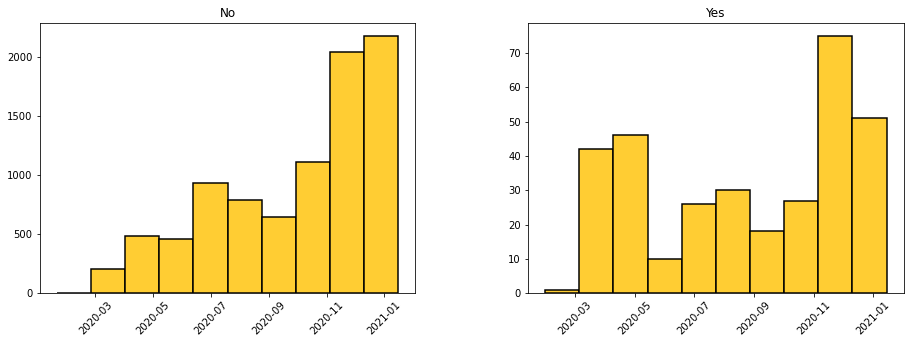

In [56]:
# Plotting Earliest Date vs Death in a histogram
df['cdc_case_earliest_dt'].hist(by=df['death_yn'], figsize=(15,5), edgecolor = "black", linewidth=1.5, color="#FFCD33", xrot=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B92C469B20>,
      dtype=object)

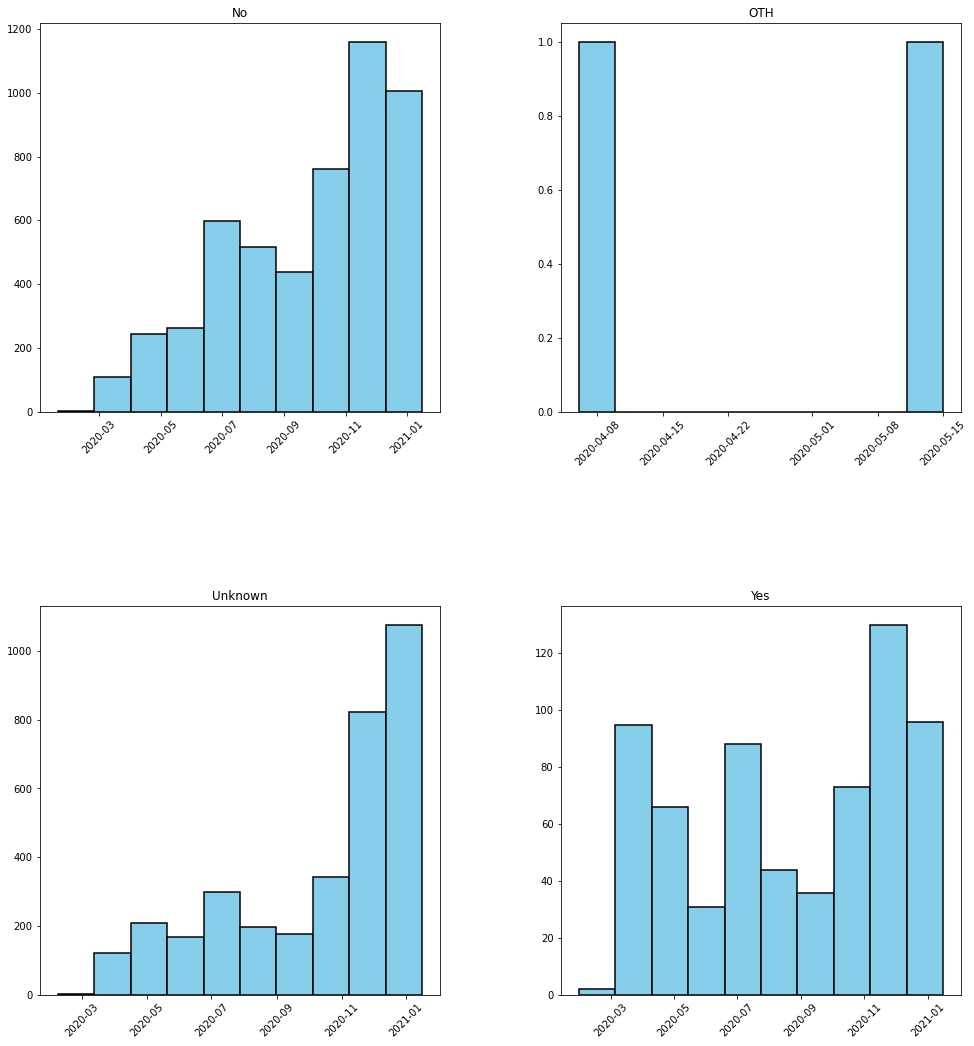

In [57]:
# Plotting Earliest Date vs Hospitalisation in a histogram
df['cdc_case_earliest_dt'].hist(by=df['hosp_yn'], figsize=(16,18), edgecolor = "black", linewidth=1.5, color="skyblue", xrot=45)

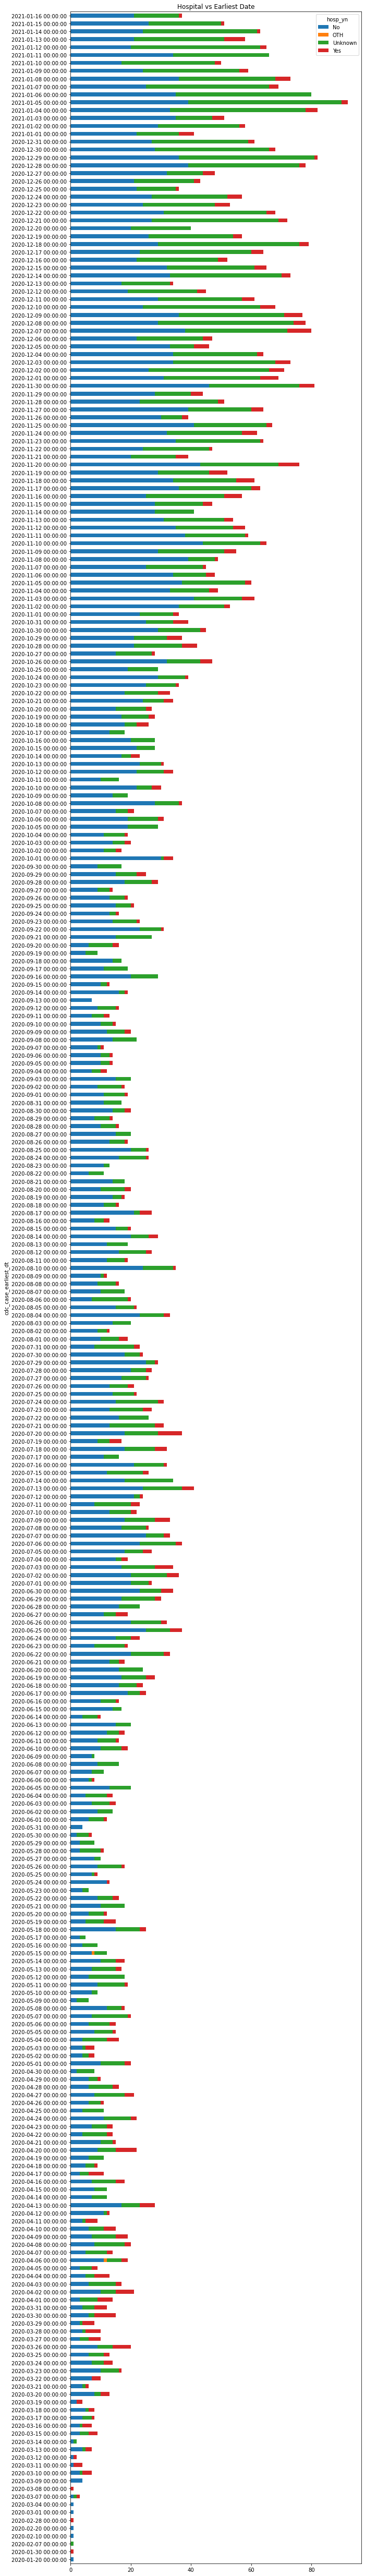

In [58]:
# Plotting Earliest Date vs Hospitalisation in a horizontal bar plot
hosp_date_df = df.groupby(["cdc_case_earliest_dt", "hosp_yn"])["hosp_yn"].count().unstack("hosp_yn").fillna(0)
hosp_date_df

hosp_date_df.plot(kind="barh", title = "Hospital vs Earliest Date", figsize=(10, 90), stacked=True)

### Categorical vs Categorical feature plots

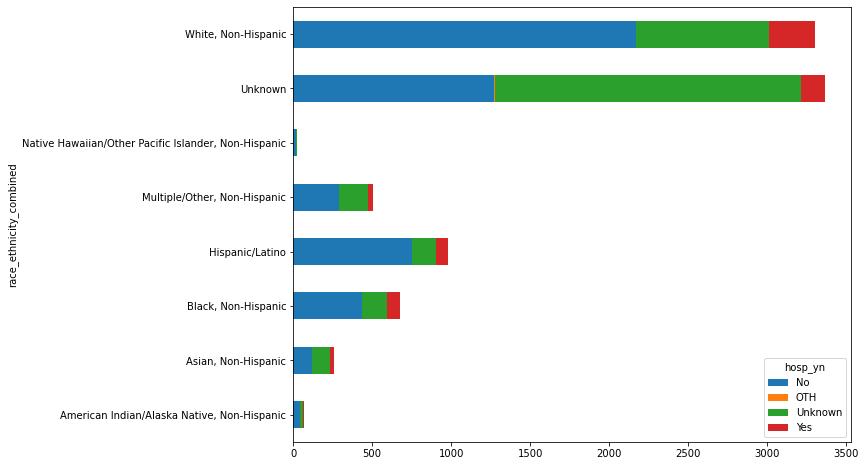

In [59]:
# Plotting Hospitalisation vs Race & Ethinicity
hos_race_df = df.groupby(["race_ethnicity_combined", "hosp_yn"])["hosp_yn"].count().unstack("hosp_yn").fillna(0)
hos_race_df.plot(kind="barh", figsize=(10, 8), stacked=True)

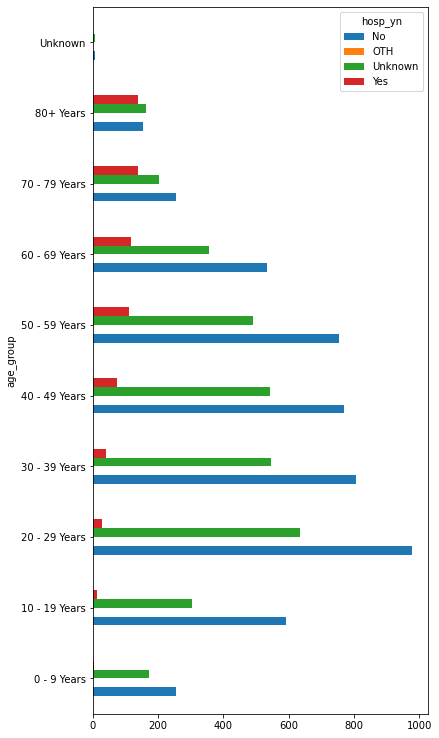

In [60]:
# Plotting Hospitalisation vs Age Group
hosp_age_df = df.groupby(["hosp_yn", "age_group"])["hosp_yn"].count().unstack("hosp_yn").fillna(0)
hosp_age_df

hosp_age_df.plot(kind="barh", figsize=(6, 13))

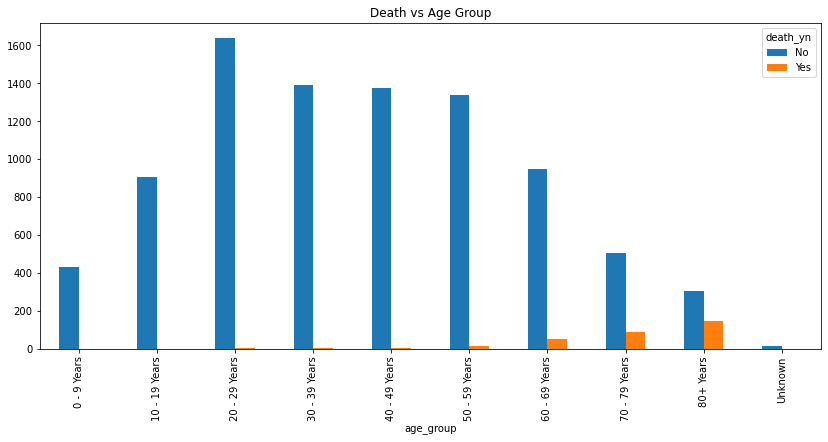

In [61]:
# Plotting Death vs Age Group
death_age_df = df.groupby(["death_yn", "age_group"])["death_yn"].count().unstack("death_yn").fillna(0)
death_age_df

death_age_df.plot(kind="bar", title="Death vs Age Group", figsize=(14, 6))

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.


- Earliest Date vs Death (histogram)

    - When chosing earliest date vs Death, I expected to see a general upward trend of "Yes" for deaths. However, this was not the case. Instead, we can see a bi-modal distribution with two clear peaks around May 2020 and December 2020. 

- Earliest Date vs Hospitalisation (histogram)

    - When plotting earliest date vs hospitalisation, we can see a uniform distribution in the "Yes" graph, meaning that this feature is equally likely to take a value in any of the ranges. There appears to be a graph that is skewed to the left for the "No" category however, which is what I would have expected for both "Yes" and "No" results.
    
- Earliest Date vs Hospitalisation (horizontal bar plot)
    - This shows us a similar result. With the "No" result becoming increasingly prevelant while the "Yes" is somewhat eratic in behaviour.
- Hospitalisation vs Race & Ethinicity (horizontal bar plot)
    - There is a clear outlier in this graph, detailing how much of a majority the "White, Non-Hospanic" have been hospitalised over other race and ethinicities.
- Hospitalisation vs Age Group (horizontal bar plot)
    - This graph tells us that as the age groups increase, the hospitalisation decreases, which is consistant with what we learned about Covid-19. As age increases, so does the risk.
- Death vs Age Group (vertical bar plot)
    - This is perhaps one of the most telling plots. There is a clear indication that as age increases, there is increased number of deaths for that age category, which is what I would have expected to see before plotting this graph.

# (4) Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1**
- Splitting Race and Ethnicity into two separate columns.

In [62]:
df[['race', 'ethnicity']] = df.race_ethnicity_combined.str.split(',', expand=True)
df.head()

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No,Unknown,None
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No,Black,Non-Hispanic
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,Black,Non-Hispanic


#### **New feature 2**
- Splitting earliest date by day, month and year respectively.

In [63]:
df["earliest_day"] = df['cdc_case_earliest_dt'].dt.day
df["earliest_month"] = df['cdc_case_earliest_dt'].dt.month
df["earliest_year"] = df['cdc_case_earliest_dt'].dt.year
df.head()

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,16,11,2020
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No,Unknown,None,19,6,2020
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None,25,7,2020
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No,Black,Non-Hispanic,13,6,2020
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,Black,Non-Hispanic,22,6,2020


#### **New feature 3**
- Creating a new feature determining if the patient is high risk. 
- They are deemed high risk if they are 80+ Years of age and current_status is a Laboratory-confirmed case

In [64]:
df['HighRisk'] = (df['age_group']=="80+ Years") & (df["current_status"] == 'Laboratory-confirmed case')
df.head(5)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year,HighRisk
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,16,11,2020,False
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No,Unknown,None,19,6,2020,False
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None,25,7,2020,False
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No,Black,Non-Hispanic,13,6,2020,False
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,Black,Non-Hispanic,22,6,2020,False


#### **New feature 4**
- Creating a new feature determining if the patient is low risk. 
- They are deemed low risk if they are not in the 80+ age category and hosp_yn is No.

In [65]:
df['LowRisk'] = (df['age_group']!="80+ Years") & (df["hosp_yn"] == 'No')
df.head(5)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year,HighRisk,LowRisk
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,16,11,2020,False,True
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No,Unknown,None,19,6,2020,False,False
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None,25,7,2020,False,True
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No,Black,Non-Hispanic,13,6,2020,False,False
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,Black,Non-Hispanic,22,6,2020,False,False


### Check logical integrity of derived data 

- We will test feature 1 & 2 together

In [66]:
df.head(10)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year,HighRisk,LowRisk
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,16,11,2020,False,True
1,2020-06-19,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,No,Unknown,None,19,6,2020,False,False
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None,25,7,2020,False,True
3,2020-06-13,Laboratory-confirmed case,Male,30 - 39 Years,"Black, Non-Hispanic",Unknown,No,Black,Non-Hispanic,13,6,2020,False,False
4,2020-06-22,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,Black,Non-Hispanic,22,6,2020,False,False
5,2020-11-22,Laboratory-confirmed case,Male,20 - 29 Years,"Asian, Non-Hispanic",No,No,Asian,Non-Hispanic,22,11,2020,False,True
6,2020-11-14,Laboratory-confirmed case,Male,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,Native Hawaiian/Other Pacific Islander,Non-Hispanic,14,11,2020,False,True
7,2020-04-29,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,No,Hispanic/Latino,None,29,4,2020,False,True
8,2020-12-28,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Unknown,No,Unknown,None,28,12,2020,False,False
9,2020-11-20,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,No,Unknown,None,20,11,2020,False,False


- race and ethnicity columns have been added. Feature test 1 passed succesfully.
- earliest_day, earliest_month & earliest_year columns have been added. Feature test 2 passed successfully.

- We will test feature 3

In [67]:
testfeature3 = df[(df["age_group"] == "80+ Years") & (df["current_status"] == 'Laboratory-confirmed case')]
testfeature3.head(5)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year,HighRisk,LowRisk
10,2020-10-01,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,1,10,2020,True,False
30,2020-10-29,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,29,10,2020,True,False
80,2020-05-07,Laboratory-confirmed case,Male,80+ Years,Unknown,Unknown,Yes,Unknown,None,7,5,2020,True,False
149,2020-10-06,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Unknown,Yes,White,Non-Hispanic,6,10,2020,True,False
166,2020-07-22,Laboratory-confirmed case,Female,80+ Years,Unknown,Unknown,No,Unknown,None,22,7,2020,True,False


- All results are populated with "True" in "HighRisk" column, feature test 3 passed successfully 

- We will test feature 4

In [68]:
testfeature4 = df[(df["age_group"] != "80+ Years") & (df["hosp_yn"] == 'No')]
testfeature4.head(5)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,race,ethnicity,earliest_day,earliest_month,earliest_year,HighRisk,LowRisk
0,2020-11-16,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,No,White,Non-Hispanic,16,11,2020,False,True
2,2020-07-25,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,No,Unknown,None,25,7,2020,False,True
5,2020-11-22,Laboratory-confirmed case,Male,20 - 29 Years,"Asian, Non-Hispanic",No,No,Asian,Non-Hispanic,22,11,2020,False,True
6,2020-11-14,Laboratory-confirmed case,Male,30 - 39 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,Native Hawaiian/Other Pacific Islander,Non-Hispanic,14,11,2020,False,True
7,2020-04-29,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,No,Hispanic/Latino,None,29,4,2020,False,True


- All results are populated with "True" in "LowRisk" column, feature test 4 passed successfully 

In [69]:
# Write the cleaned dataframe to a csv file
df.to_csv('CovidCleaned_3.csv', index=False)